In [23]:
#from io import BytesIO
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [27]:
path = os.getcwd()[:-11] +"\\TestComponents\\TestSets\\WS2"

In [29]:
observed_data = pd.read_csv(path + "\\observed.csv",index_col=0)

observed_data.sort_index(axis=0,inplace=True)

In [30]:
tests = []
test_name = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        tests.append(file)       
        test_name.append(os.path.splitext(file)[0])

In [35]:
test_name

['8Oat',
 '8Peas',
 '8Wheat',
 'actualWS2DataConfig',
 'FertiliserData',
 'observed']

In [32]:
Alltests =[]
for t in tests[:]:  
    testframe = pd.read_csv(path+"\\"+t,index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=test_name)

observed_data.index=pd.to_datetime(observed_data.index,format="%d/%m/%Y %H:%M")

observed_test = observed_data.columns.get_level_values(0).drop_duplicates()
AllData.sort_index(axis=0,inplace=True)

AllData.index = pd.to_datetime(AllData.index)

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_19752\174541646.py:7: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  AllData = pd.concat(Alltests,axis=1,keys=test_name)
C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_19752\174541646.py:7: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  AllData = pd.concat(Alltests,axis=1,keys=test_name)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [20]:
tests = AllData.columns.get_level_values(0).drop_duplicates()
colors = pd.Series(['r','b','g'])

start = dt.datetime.date(AllData['8Wheat'].dropna().index.min())
end = dt.datetime.date(AllData['8Wheat'].dropna().index.max())

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_19752\4108632520.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  Graph.tight_layout(pad=1.5)


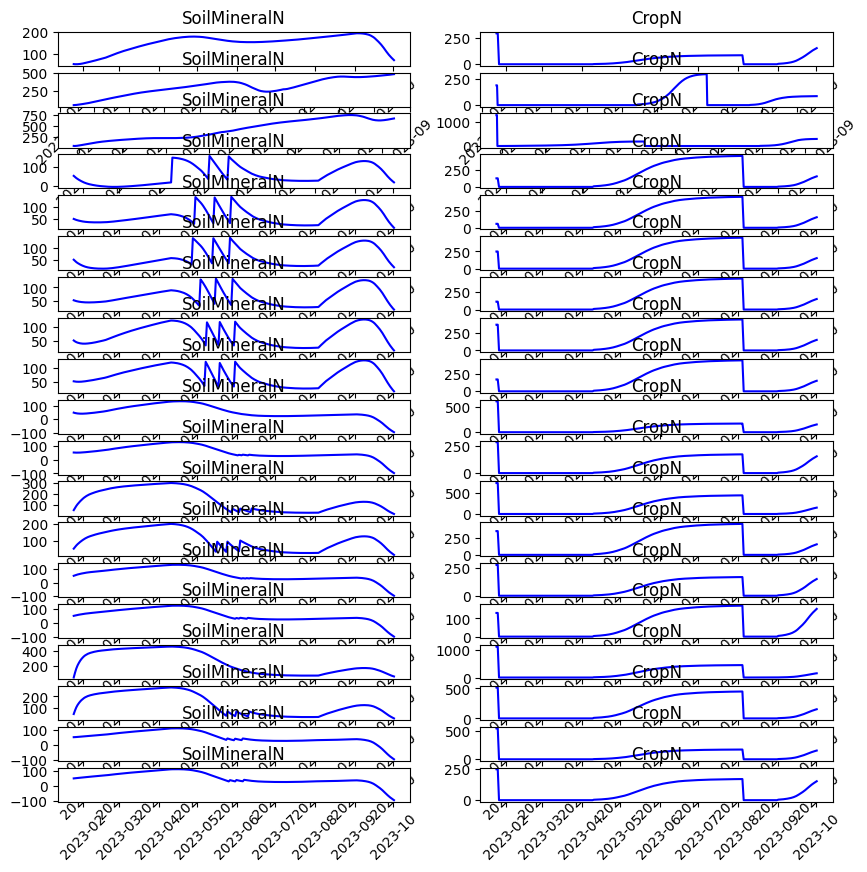

In [21]:
def makeplot(Data,color):
    plt.plot(Data,color=color)
    
def make_observed(observed):
    plt.plot(observed.index,observed.loc[:,'Nitrogen'],'*',color='g')     
        
Graph = plt.figure(figsize=(10,10))
pos = 1
row_num=len(tests)

for t in tests:
    start = dt.datetime.date(AllData[t].dropna().index.min())
    end = dt.datetime.date(AllData[t].dropna().index.max())
    datefilter = []
    for d in observed_data.index:
        ret = False
        if ((d >= pd.Timestamp(start)) and (d<=pd.Timestamp(end))):
            ret = True
            # if site id matching the observed id make it true only then 
        datefilter.append(ret)
        
    color = 'b'
    Graph.add_subplot(row_num,2,pos)
    Data = AllData.loc[:,(t,'SoilMineralN')].sort_index()
    plt.xticks(rotation = 45)    
    plt.title("SoilMineralN")
    makeplot(Data,color)
    make_observed(observed_data[datefilter])
    Graph.tight_layout(pad=1.5)
    pos+=1
    
    Graph.add_subplot(row_num,2,pos)
    plt.xticks(rotation = 45)  
    plt.title("CropN")
    Data = AllData.loc[:,(t,'CropN')].sort_index()
    makeplot(Data,color)
    make_observed(observed_data[datefilter])
    pos+=1

plt.savefig('testplot.png')
